## Python assigment
### Valeria Velasquez Zapata

This assigment contains all the code and results from the Python assigment fot the BCB546X course spring 2017 
Iowa State University

In [1]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd

### The first function is called get_sequences_from_file, and uses as parameters a fasta_fn that represents a fasta file.

* For that purpose, an empty dictionary is created and called sequence_data_dict

* After the dictionary is created, it will be filled with the information from the fasta file, by using a for loop and the SeqIO.parse function

* The SeqIO.parse function takes an input file with a type (fasta), and returns an iterator giving SeqRecord objects 

* Then, for each record after parsing the file, we take its description (by calling the split function) and build the species_name list as the elements of the description separated by a space. 

* We also take the sequence of each record and named as the sequence_data_dict[species_name] of the dictionary

* Finally, we return the dictionary 

#### References
http://biopython.org/wiki/SeqIO

http://biopython.org/DIST/docs/api/Bio.SeqIO-module.html

In [2]:
def get_sequences_from_file(fasta_fn):
    #we create an empty dictionary
    sequence_data_dict = {}
    #we create a for loop to iterate thorugh the fasta file and call the SeqIO.parse function to get a record and a description
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2] # the name is created with the second and third elements of the description
        sequence_data_dict[species_name] = record.seq #we store the values and the keys of the dictionary using the record and the species names
    return(sequence_data_dict)

### Translate function

* First we use the Codon table from the NCBI, using the vertebrate mitochondrial code. We can test what it prints by


In [3]:
mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
print(mito_table)

Table 2 Vertebrate Mitochondrial, SGC1

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA W   | A
T | TTG L   | TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L   | CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I(s)| ACT T   | AAT N   | AGT S   | T
A | ATC I(s)| ACC T   | AAC N   | AGC S   | C
A | ATA M(s)| ACA T   | AAA K   | AGA Stop| A
A | ATG M(s)| ACG T   | AAG K   | AGG Stop| G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V(s)| GCG A   | GAG E   | GGG G   

* After confirming the contents it is possible to create an empty string to store the aminoacid sequence

* Then, we build a for loop to iterate through the nucleotide string  every 3 characters 

* We call the codon as the string of each i, i+1 and i+2 charaters in string_nucleotides and aminoacid as the translation for each codon according to mito_table

* Before adding the aminoacid to the aa_seq_string we test if it is an Stop codon and if so, we break the loop in order to avoid that the sequence be translated beyond that codon

* Finally we return the aa_seq_string

In [4]:
def translate_function(string_nucleotides): 
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] # this should work using BioPython (be sure to check what this returns)
    aa_seq_string =""
    for i in range(0, len(string_nucleotides), 3):  # for-loop through every 3rd position in string_nucleotides to get the codon using range subsets
        codon = string_nucleotides[i:i+3]
        if codon in mito_table.stop_codons:
            break        # IMPORTANT: if the sequence has a stop codon at the end, you should leave it off    
        aminoacid = mito_table.forward_table[codon] # this is how you can retrieve the amino acid
        aa_seq_string += aminoacid # add the aa to aa_seq_string
    return(aa_seq_string)

### My alternative translate function

We can use the translate function from biopython to achieve this part of the assigment, just as this page explains:

http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc25

* The output of the translate function is a tuple with the translated string, so we can extract that information in the aa_seq_string

In [5]:
from Bio.Seq import Seq
def my_translate_function(string_nucleotides): 
    #coding_dna = Seq(string_nucleotides) # we define a Seq using a string as an input and the IUPAC.unambigous_dna label
    result = string_nucleotides.translate(table="Vertebrate Mitochondrial", to_stop=True) # we call the translate function on the sequence
    aa_seq_string = str(result) # we pass the result of the trslation to a string
    return(aa_seq_string) # we return the string

### My count aa function

This function takes an amonoacid sequence aa_seq as Bio Seq or as String and calculates the proportion of each aminoacis type (charged, polar or hydrophobic)

* For achieving that we first define the vectors with the entries for each type and initialize the counting for storing the numbers for our sequence of interest

* After that we build a for loop that iterates through the entire sequence and with an if statement we test if each aminoacid matches with any of the cathegories, increasing the counter accordingly

* Finally we build a vector to store the portportion result calculated as the rate between the counter and the size of the sequence (we assume it does not have an stop codon included in the string)


In [6]:
def get_proportion_aa(aa_seq):
    #we create a vector that contains the charged, polar and hydrophobic aminoacids
    charged = ['R','K','D','E'] 
    polar = ['Q','N','H','S','T','Y','C','M','W']
    hydrophobic = ['A','I','L','F','V','P','G']
    #we create a counter that stores the number of the charged, polar and hydrophobic aminoacids in our sequence of interest
    charged_count=0
    polar_count=0
    hydrophobic_count=0
    #we create a for loof to iterate through our sequence of interest and test with an if statement the aminoacid type, 
    #increasing the counter accordingly
    for aa in str(aa_seq):
        if aa in charged:
            charged_count += 1
        elif aa in polar:
            polar_count += 1
        elif aa in hydrophobic:
            hydrophobic_count += 1
    #we create a vector to store the results, calculated as the ration between each counter and the sequence size
    result = [charged_count/len(aa_seq), polar_count/len(aa_seq), hydrophobic_count/len(aa_seq)]
    return result


### Main function

After opening the bears_data.csv file and store it as a list we should write a for-loop that translates each sequence and also gets the proportion of each aa type in that translated sequence and adds those data to dataframe, using the previous functions

* Here we can choose between each of the two translating functions and then we call the get_proportion_fucntion on each value on the dictionary

* After that we can add thse values, using loc for setting each proportion, matching the species column in the dataframe with the key, and the respective column for the aminoacid type

In [41]:
cytb_seqs = get_sequences_from_file("bears_cytb.fasta") 
bear_df = pd.read_csv("bears_data.csv") # Includes only data for body mass currently and empty cells for other columns
species_list = list(bear_df.species)

for key, value in cytb_seqs.items():
    #aa_seq =translate_function(str(value)) # whichever function you prefer of #2 
    aa_seq = my_translate_function(value)   # or #3
    proportion = get_proportion_aa(aa_seq) # get proportions of each aa type
    bear_df.loc[bear_df.species==key, 'charged'] = proportion[0]
    bear_df.loc[bear_df.species==key, 'polar'] = proportion[1]
    bear_df.loc[bear_df.species==key, 'hydrophobic'] = proportion[2] # set the values of each proportion in the dataframe (i.e., fill in empty cells in DF)

To verify the functioning of this function we can print the dataframe

In [8]:
print(bear_df)

                  species     mass   charged     polar  hydrophobic
0          Ursus spelaeus  550.800  0.092348  0.329815     0.577836
1            Ursus arctos  203.500  0.092348  0.324538     0.583113
2        Ursus thibetanus   99.714  0.092348  0.327177     0.580475
3        Melursus ursinus  100.030  0.089710  0.340369     0.569921
4        Ursus americanus  110.560  0.089710  0.337731     0.572559
5     Helarctos malayanus   47.020  0.092348  0.340369     0.567282
6  Ailuropoda melanoleuca  118.200  0.089710  0.343008     0.567282
7      Tremarctos ornatus  140.700  0.089710  0.335092     0.575198
8         Ursus maritimus  425.100  0.092348  0.327177     0.580475


In [9]:
%matplotlib inline

### Plot a bar-chart of the mass with the x-axes labeled with species names.

We can use the seaborn library to do this plot

* First, we import the library and then we create the plot as a barplot with the required arguments (species and mass)

* To give it a better format we can rotate the labels for each specie name and then avoid overlaying. For that purpose we call the set.xthicklables, and define the labels as the species names, a rotation of 30 degrees, and aligned to the right

#### References

http://seaborn.pydata.org/generated/seaborn.barplot.html

http://stackoverflow.com/questions/26540035/rotate-label-text-in-seaborn-factorplot

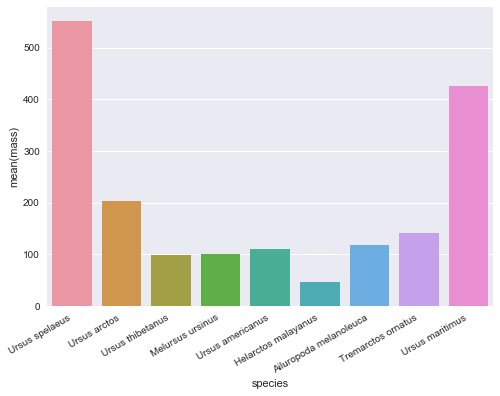

In [10]:
import seaborn as sns
bar_chart = sns.barplot(x = 'species', y = 'mass', data=bear_df) #we create the plot
bar_chart.set_xticklabels(labels = bear_df.species, rotation=30, horizontalalignment='right') # formatting the labels

Looking at this plot we can see that the largest mass is associated with *Ursus spelaeus*, followed by *Ursus maritimus*. *Ursus spelaeus* represents one extinct species of bear from the pleistocene period. After checking the gene sequence, there is no a big difference with the other species, then, the large size of the cytb protein for this specie should be explaind if this is associated with other subunits. Apparently, the mass and also the composition of cytb can be an interesting feature for undersanding the evolution of this gene in the lineage.

### Plot a visualization of the proportions for amino-acid type for the bear species

For making this plot we can use a stacked barplot. While looking for library options for achieving this, I found the matplotlib

* First, we should import the library and numpy for making the arange function to indicate the axis partition 

* Then, we can create an instance of the index for the x-axis, by calling the arange function for the lenght of the dataframe

* After this, we create the plot, by adding each component of the aminoacid proportion to it (i.e charged, polar and hydrophobic). By calling bottom we are indicating that the plot is stacked

* Finally we give the labels for the features in the plot: x and y labels, xticks to indicate the labels for each specie, with a rotation of 30 degrees and aligned to the right, and the legend for each aminoacid type, located at the outside of the plot

#### References
http://matplotlib.org/examples/pylab_examples/bar_stacked.html

http://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot


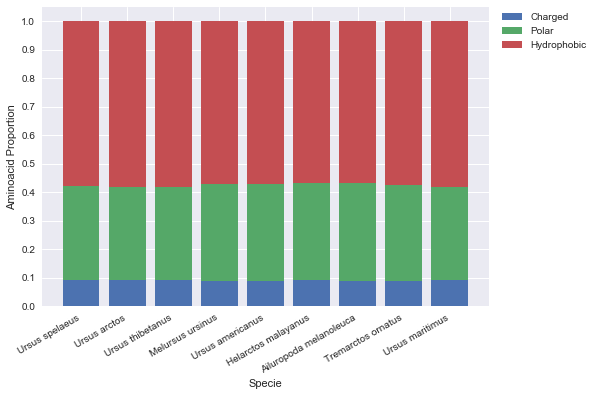

In [11]:
# a stacked bar plot
import numpy as np
import matplotlib.pyplot as plt
#we create the plots, indicating that it is a stacked by using bottom
ind = np.arange(len(bear_df))
p1= plt.bar(ind, bear_df.charged)
p2= plt.bar(ind, bear_df.polar, bottom = bear_df.charged)
p3= plt.bar(ind, bear_df.hydrophobic, bottom = bear_df.charged + bear_df.polar)
#we format the plot labels and legends
plt.ylabel('Aminoacid Proportion')
plt.xlabel('Specie')
plt.xticks(ind, bear_df.species, rotation=30, horizontalalignment='right')
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend((p1[0], p2[0], p3[0]), ('Charged', 'Polar', 'Hydrophobic'), bbox_to_anchor=(1.01, 1.01))

plt.show()

After creating this plot we can see that the proportion of aminoacids are almost identical for all the species, which indicates that this protein is highly conserved. This can mean that is under a high negative selection, so changes to these proportions can alter severely its function. All these can be explained if we take into account that cit B protein is a membrane protein, so this type of aminoacids are involved in its correct folding and anchoring to the membrane: 

* For example, the hidrophobic aminoacids will help the protein to interact with the phosoholipids in the membrane
* The polar aminoacids will face the aqueous environment 
* The charged aminoacids are likely involved in the electron-transport function of this protein in the respitatory chain

### Save the new dataframe to a file called "bears_mass_cytb.csv"

We can save the dataframe to a file by using the to_csv funtcion


In [12]:
bear_df.to_csv('bears_mass_cytb.csv')

### Bonus

We will print the aminoacids sequences and their lengths for each specie, and then we will compute the number of matches for each amoniacid type according to a reference (for this example we will use *Ursus americanus*) and then we will plot each cathegory  

* First, we create a function to count each match between the reference and all the species, taking into account the aminoacid types and the mismatches. This function depends of the sequence of aminoacids of the sequence of interest and from the reference

* To iterate over each aminoacid in the reference sequence we create a counter i to access the data, and we increase it at the end of each iteration

* Then, we create a for loop to access the dictionary with all the sequences and we call the counting_type_reference function, storing the data in new colums in the dataframe

In [42]:
def counting_type_reference(aa_seq, aa_ref): #we create a new function called counting_type_reference
    #references to each aminoacid type
    charged = ['R','K','D','E'] 
    polar = ['Q','N','H','S','T','Y','C','M','W']
    hydrophobic = ['A','I','L','F','V','P','G']
    #counters
    charged_count=0
    polar_count=0
    hydrophobic_count=0
    no_matches_count=0
    i=0
    #iterate over each aminoacid in the sequence of interest
    for aa in str(aa_seq):  
        #check if the aminoacid in the sequence of interest and in the reference belong to each group, increasing the respective counter
        if aa in charged and aa_ref[i] in charged:
            charged_count += 1
        elif aa in polar and aa_ref[i] in polar:
            polar_count += 1
        elif aa in hydrophobic and aa_ref[i] in hydrophobic:
            hydrophobic_count += 1
        else:
            no_matches_count +=1  
        i+=1
    #we store the results in a vector
    result = [charged_count, polar_count, hydrophobic_count, no_matches_count]
    return result
#copy the dataframe to avoid modifying the original data
bear_df_copy= bear_df.copy()
#iteration over the dictionary 
for key, value in cytb_seqs.items():
    aa_ref = str(my_translate_function(cytb_seqs['Ursus americanus']))
    aa_seq = my_translate_function(value)
    counting_reference = counting_type_reference(aa_seq, aa_ref)
    #addition of each result to as new column in the dataframe
    bear_df_copy.loc[bear_df.species==key, 'charged_ref'] = counting_reference[0]
    bear_df_copy.loc[bear_df.species==key, 'polar_ref'] = counting_reference[1]
    bear_df_copy.loc[bear_df.species==key, 'hydrophobic_ref'] = counting_reference[2]
    bear_df_copy.loc[bear_df.species==key, 'no_matches_ref'] = counting_reference[3]
    #printing the species name, the aminoacid sequence and the size of the protein
    print(key)
    print(aa_seq)
    print(len(aa_seq))

Ursus spelaeus
MTNIRKTHPLAKIINNSFIDLPTPSNISAWWNFGSLLGVCLILQILTGLFLAMHYTSDTTTAFSSITHICRDVHYGWVIRYMHANGASMFFICLFMHVGRGLYYGSYLFSETWNIGIILLLTVMATAFMGYVLPWGQMSFWGATVITNLLSAIPYIGTDLVEWIWGGFSVDKATLTRFFAFHFILPFIILALAAVHLLFLHETGSNNPSGIPSDSDKIPFHPYYTIKDILGALLLTLALAALVLFSPDLLGDPDNYTPANPLSTPPHIKPEWYFLFAYAILRFIPNKLGGVLALIFSILILAIISLLHTSKQRGMMFRPLSQCLFWLLVADLLTLTWIGGQPVEHPFIIIGQLASILYFTIPLVLMPIAGIIENNLLKW
379
Ursus arctos
MTNIRKTHPLAKIINNSLIDLPTPSNISAWWNFGSLLGVCLILQILTGLFLAMHYTPDTTTAFSSVTHICRDVHYGWVIRYVHANGASIFFICLFMHVGRGLYYGSYLFSETWNIGIILLFTIMATAFMGYVLPWGQMSFWGATVITNLLSAIPYIGTDLVEWIWGGFSVDKATLTRFFAFHFILPFIILALAAVHLLFLHETGSNNPSGIPSDSDKIPFHPYYTIKDILGALLLALTLATLVLFSPDLLGDPDNYTPANPLSTPPHIKPEWYFLFAYAILRSIPNKLGGVLALIFSILILAIIPLLHTSKQRGMMFRPLSQCLFWLLVADLLTLTWIGGQPVEHPFIIIGQLASILYFTILLVLMPIAGIIENNLLKW
379
Ursus thibetanus
MTNIRKTHPLAKIINNSLIDLPAPSNISAWWNFGSLLGMCLILQILTGLFLAMHYTSDATTAFSSVAHICRDVHYGWIIRYMHANGASMFFICLFMHVGRGLYYGSYLLSETWNIGIILLFTVMATAFMGYVLPWGQMSFWGATVITNLLSAIPYIGTDLVEWIWGGFSVDKATLTRFFAFHFILPF

We can print the dataframe to see the new added columns

In [44]:
print(bear_df_copy)

                  species     mass   charged     polar  hydrophobic  \
0          Ursus spelaeus  550.800  0.092348  0.329815     0.577836   
1            Ursus arctos  203.500  0.092348  0.324538     0.583113   
2        Ursus thibetanus   99.714  0.092348  0.327177     0.580475   
3        Melursus ursinus  100.030  0.089710  0.340369     0.569921   
4        Ursus americanus  110.560  0.089710  0.337731     0.572559   
5     Helarctos malayanus   47.020  0.092348  0.340369     0.567282   
6  Ailuropoda melanoleuca  118.200  0.089710  0.343008     0.567282   
7      Tremarctos ornatus  140.700  0.089710  0.335092     0.575198   
8         Ursus maritimus  425.100  0.092348  0.327177     0.580475   

   charged_ref  polar_ref  hydrophobic_ref  no_matches_ref  
0         34.0      123.0            215.0             7.0  
1         34.0      122.0            216.0             7.0  
2         34.0      123.0            216.0             6.0  
3         33.0      124.0            213.0   

We can plot each new category, but for just give an example we will plot the no matches, to identify the difference in the comparisons 

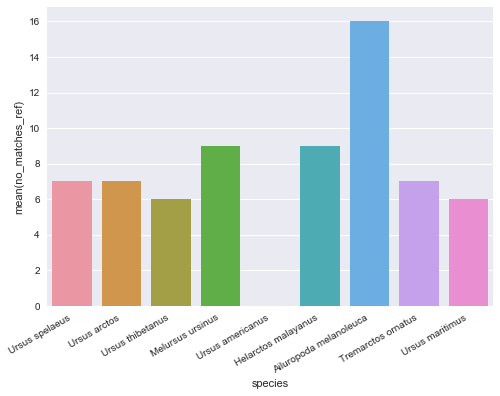

In [45]:
bar_chart = sns.barplot(x = 'species', y = 'no_matches_ref', data=bear_df_copy) #we create the plot
bar_chart.set_xticklabels(labels = bear_df.species, rotation=30, horizontalalignment='right')

These results show that the biggest difference between the reference and the other species is with *A. melanoleuca* with 16 mismatches. For the other species the number of mistmaches were about 8. Note that we got zero mismatches with *U americanus* because that was the reference specie.